In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import IPython.display as display
from IPython.display import HTML

In [2]:
GITHUB_RENDER = True

In [3]:
def basic_line_plotly(plot_df, x, y, color_col, xt, yt, title, WIDTH, HEIGHT):
    fig = px.line(plot_df, x=x, y=y, color=color_col, labels={'x': xt, 'y': yt}, title=title)
    fig.update_layout(title_x=0.5, width=WIDTH, height=HEIGHT, yaxis=dict(tickformat=',d'))
    
    if GITHUB_RENDER:
        image_bytes = pio.to_image(fig, format='png')
        display.display(display.Image(image_bytes))
    else:
        fig.show()

# Reddit

In [4]:
df = pd.read_csv('../out/new_filtered_df_60.csv', index_col=0)
df.head()

,reddit image,imkg image,score
0,./data/wholesomememes/cfifgh4a8k9b1.jpg,https://i.imgflip.com/4gy1a3.jpg,0.672966
1,./data/wholesomememes/btmg25ri6i9b1.jpg,https://i.imgflip.com/2qr4vs.jpg,0.636262
2,./data/wholesomememes/1pnt8qii0c9b1.png,https://i.imgflip.com/3mcrnj.jpg,0.737536
3,./data/wholesomememes/9lec0ze5m39b1.jpg,https://i.imgflip.com/254vtb.jpg,0.726682
4,./data/wholesomememes/a7dh6u2qk09b1.jpg,https://i.imgflip.com/100kjs.jpg,0.896522


In [5]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y

1326032it [00:00, 1383847.84it/s]


In [6]:
# Add timestamp information
modified_df = pd.DataFrame(columns=["reddit image", "imkg image", "score", "timestamp", "reddit score", "IMKG Class"])
for row in tqdm(df.iterrows()):
    reddit_image = row[1]['reddit image']
    ri_cat = reddit_image.split('/')[2]+".csv"
    df_file = pd.read_csv('../data/files/dataset_{}'.format(ri_cat))
    ts = df_file[df_file['image_location'] == reddit_image]['timestamp'].values[0]
    reddit_score = df_file[df_file['image_location'] == reddit_image]['score'].values[0]
    
    imkg_image = row[1]['imkg image']
    imkg_image = imkg_image.split('/')[-1].split('.')[0]
    imkg_image = back_dict[imkg_image].split('/')[-1]
    imkg_image = imkg_image.split(':')[-1]
    
    modified_df.loc[len(modified_df)] = [row[1]['reddit image'], row[1]['imkg image'], row[1]['score'], ts, reddit_score, imkg_image]

1036it [00:12, 80.99it/s]


In [7]:
modified_df.shape

(1036, 6)

In [8]:
modified_df.head()

,reddit image,imkg image,score,timestamp,reddit score,IMKG Class
0,./data/wholesomememes/cfifgh4a8k9b1.jpg,https://i.imgflip.com/4gy1a3.jpg,0.672966,2023-07-02 10:14:36,31,Overwatch-Mercy-Meme
1,./data/wholesomememes/btmg25ri6i9b1.jpg,https://i.imgflip.com/2qr4vs.jpg,0.636262,2023-07-02 03:21:04,82,It-aint-much-but-its-honest-work
2,./data/wholesomememes/1pnt8qii0c9b1.png,https://i.imgflip.com/3mcrnj.jpg,0.737536,2023-07-01 06:36:41,586,Never-again
3,./data/wholesomememes/9lec0ze5m39b1.jpg,https://i.imgflip.com/254vtb.jpg,0.726682,2023-06-30 02:21:47,169,Real-Shit
4,./data/wholesomememes/a7dh6u2qk09b1.jpg,https://i.imgflip.com/100kjs.jpg,0.896522,2023-06-29 16:08:23,40,Philosoraptor


In [9]:
modified_df['IMKG Class'].value_counts()

IMKG Class
Wants-to-know-your-location    30
Grus-Plan                      20
Drake-Hotline-Bling            17
Press-button-hard-choice       16
Disloyal-Boyfriend             14
                               ..
Types-of-Headaches-meme         1
Fist-pump-baby                  1
Knight-with-arrow-in-helmet     1
Roll-Safe-Think-About-It        1
Hide-the-pain-harold            1
Name: count, Length: 419, dtype: int64

In [10]:
# Popular IMKG class
popular_imkg_class = ["Wants-to-know-your-location", "Grus-Plan", "Drake-Hotline-Bling", \
                 "Press-button-hard-choice", "Disloyal-Boyfriend"]

In [11]:
# Filter rest of the classes
popular_df = modified_df[modified_df['IMKG Class'].isin(popular_imkg_class)]
popular_df.shape

(97, 6)

In [12]:
popular_df.head()

,reddit image,imkg image,score,timestamp,reddit score,IMKG Class
17,./data/wholesomememes/0j3urtsfzm7b1.jpg,https://i.imgflip.com/2vzetm.jpg,0.689970,2023-06-22 17:21:59,27179,Wants-to-know-your-location
65,./data/dank_meme/dy8s1kmjew0b1.jpg,https://i.imgflip.com/2vzetm.jpg,0.636596,2023-05-19 17:33:33,359,Wants-to-know-your-location
66,./data/dank_meme/htnl67p7tt0b1.jpg,https://i.imgflip.com/2vzetm.jpg,0.655700,2023-05-19 08:50:27,0,Wants-to-know-your-location
71,./data/dank_meme/9tynk7jqsf0b1.jpg,https://i.imgflip.com/1us54k.jpg,0.689138,2023-05-17 14:43:38,5,Disloyal-Boyfriend
75,./data/dank_meme/lz0by4p5dlza1.jpg,https://i.imgflip.com/2vzetm.jpg,0.673084,2023-05-13 03:22:04,54,Wants-to-know-your-location


## Daily trend analysis

In [13]:
popular_df['Date'] = pd.to_datetime(popular_df['timestamp'])
popular_df = popular_df[(popular_df["Date"].dt.month >= 5) & (popular_df["Date"].dt.month <= 6) & (popular_df["Date"].dt.year >= 2023)]
popular_df['Date'] = pd.to_datetime(popular_df['Date']).dt.date
popular_df_grouped = popular_df.groupby(['Date', 'IMKG Class']).size().reset_index(name='Counts')

/tmp/ipykernel_150998/3518319982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_df['Date'] = pd.to_datetime(popular_df['timestamp'])


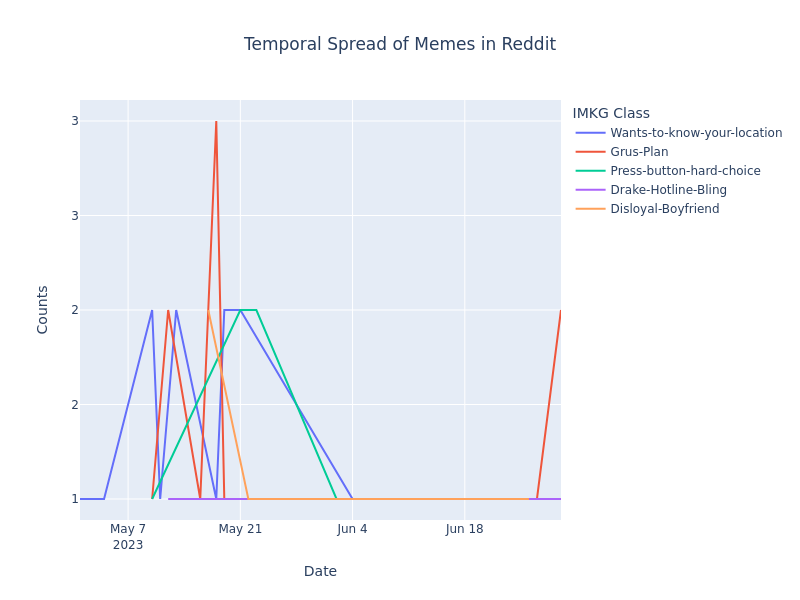

In [14]:
basic_line_plotly(popular_df_grouped, x='Date', y='Counts', \
                  color_col='IMKG Class', xt='Date', \
                  yt='Count', title='Temporal Spread of Memes in Reddit', \
                  WIDTH=800, HEIGHT=600)

# Discord

In [15]:
df = pd.read_csv('../out/new_discord_filtered_df_60.csv', index_col=0)
df.head()

,discord image,imkg image,score,timestamp,channel
0,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/287qcu.jpg,0.735655,2023-05-24T23:10:21.857+00:00,memeplex
1,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/2sr84j.jpg,0.724213,2023-05-22T21:27:55.494+00:00,memeplex
2,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/429rd9.jpg,0.722207,2023-05-22T13:25:41.995+00:00,memeplex
3,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/2nz2d1.jpg,0.842699,2023-05-22T13:22:33.758+00:00,memeplex
4,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/2lbscf.jpg,0.798289,2023-05-22T10:11:30.87+00:00,memeplex


In [16]:
df.shape

(777, 5)

In [17]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y

1326032it [00:00, 1387234.23it/s]


In [18]:
# Add timestamp information
modified_df = pd.DataFrame(columns=["discord image", "imkg image", "score", "timestamp", "IMKG Class"])
for row in tqdm(df.iterrows()):
    imkg_image = row[1]['imkg image']
    imkg_image = imkg_image.split('/')[-1].split('.')[0]
    imkg_image = back_dict[imkg_image].split('/')[-1]
    imkg_image = imkg_image.split(':')[-1]
    modified_df.loc[len(modified_df)] = [row[1]['discord image'], row[1]['imkg image'], row[1]['score'], row[1]['timestamp'], imkg_image]

777it [00:00, 1005.55it/s]


In [19]:
modified_df['IMKG Class'].value_counts()

IMKG Class
Wants-to-know-your-location                           37
Yhorm-Dark-Souls                                      14
Change-My-Mind                                        13
Batman-Slapping-Robin                                 13
Grus-Plan                                             13
                                                      ..
Wake-Up-Babe                                           1
cast-it-into-the-fire                                  1
Pretending-To-Be-Happy-Hiding-Crying-Behind-A-Mask     1
Joe-Biden                                              1
Brain-Before-Sleep                                     1
Name: count, Length: 351, dtype: int64

In [20]:
# Popular IMKG class
popular_imkg_class = ["Wants-to-know-your-location", "Yhorm-Dark-Souls", "Change-My-Mind", \
                 "Batman-Slapping-Robin", "Grus-Plan"]

In [21]:
# Filter rest of the classes
popular_df = modified_df[modified_df['IMKG Class'].isin(popular_imkg_class)]
popular_df.shape

(90, 5)

In [22]:
popular_df.head()

,discord image,imkg image,score,timestamp,IMKG Class
3,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/2nz2d1.jpg,0.842699,2023-05-22T13:22:33.758+00:00,Change-My-Mind
4,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/2lbscf.jpg,0.798289,2023-05-22T10:11:30.87+00:00,Change-My-Mind
10,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/267bdp.jpg,0.805695,2023-05-10T05:42:19.759+00:00,Grus-Plan
11,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/267bdp.jpg,0.805276,2023-05-10T05:15:18.931+00:00,Grus-Plan
12,https://cdn.discordapp.com/attachments/1043809...,https://i.imgflip.com/267bdp.jpg,0.805276,2023-05-10T04:03:07.099+00:00,Grus-Plan


## Daily trend analysis

In [23]:
popular_df['Date'] = pd.to_datetime(popular_df['timestamp'])
popular_df = popular_df[(popular_df["Date"].dt.month >= 5) & (popular_df["Date"].dt.month <= 6) & (popular_df["Date"].dt.year >= 2023)]
popular_df['Date'] = pd.to_datetime(popular_df['Date']).dt.date
popular_df_grouped = popular_df.groupby(['Date', 'IMKG Class']).size().reset_index(name='Counts')

/tmp/ipykernel_150998/3518319982.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



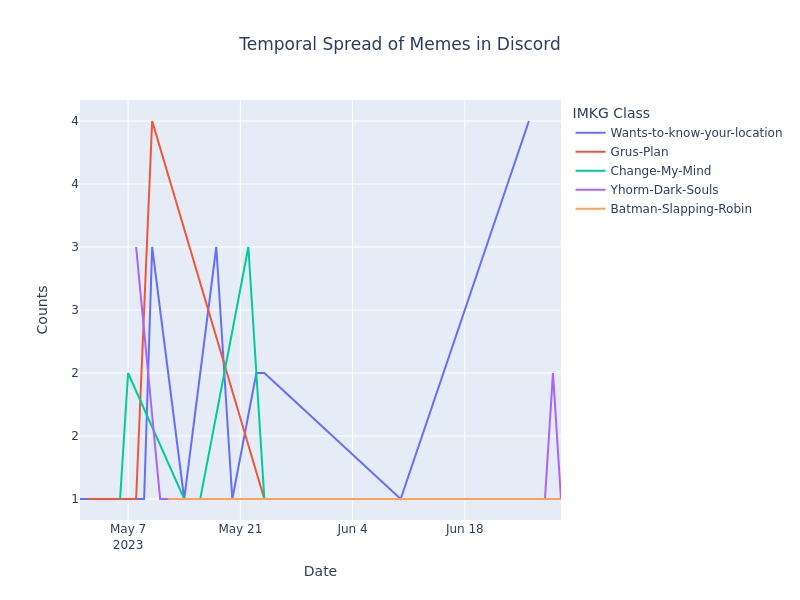

In [24]:
basic_line_plotly(popular_df_grouped, x='Date', y='Counts', \
                  color_col='IMKG Class', xt='Date', \
                  yt='Count', title='Temporal Spread of Memes in Discord', \
                  WIDTH=800, HEIGHT=600)